In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import os
import matplotlib.pyplot as plt
import matplotlib as mplc
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

/share/home/zhangyr/.conda/envs/web_jupyter/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/share/home/zhangyr/.conda/envs/web_jupyter/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


NameError: name 'mpl' is not defined

In [117]:
eye = pd.read_csv('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/data/UKB/eye/502137_baseline_152features_20241227.csv',index_col=0)
eye

,participant.p5185_i0,participant.p5186_i0,participant.p5187_i0,participant.p5188_i0,participant.p5190_i0,participant.p5193_i0,participant.p5199_i0,participant.p5200_i0,participant.p5201_i0,participant.p5202_i0,...,participant.p28544_i0,participant.p28545_i0,participant.p28546_i0,participant.p28547_i0,participant.p28548_i0,participant.p28549_i0,participant.p28550_i0,participant.p28551_i0,participant.p28552_i0,participant.p28553_i0
participant.eid,,,,,,,,,,,,,,,,,,,,,
1000019.0,1.0,89.0,1.0,148.0,193.0,253.0,-0.1,5.0,-0.08,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000035.0,1.0,9.0,1.0,79.0,122.0,163.0,0.2,5.0,0.06,4.0,...,450.0,961.0,0.976016,0.950999,0.955078,2.53711,0.0,0.00000,69.7668,70.5140
1000046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000054.0,1.0,9.0,1.0,53.0,75.0,116.0,-0.2,5.0,-0.10,2.0,...,930.0,961.0,0.976314,0.682629,1.216800,3.49414,0.0,3.49414,76.1145,74.0454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023638.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023642.0,1.0,95.0,1.0,172.0,NaN,NaN,0.3,5.0,0.34,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## depression

In [48]:
eye = np.load('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/results/eye/SVM_eye_120features_20241227.npy', allow_pickle=True)

In [49]:
age = eye.tolist()['eye-meatures']['female_res']['true_y'] +eye.tolist()['eye-meatures']['male_res']['true_y']
eye_age = eye.tolist()['eye-meatures']['female_res']['predicted_y'] +eye.tolist()['eye-meatures']['male_res']['predicted_y']
eids = eye.tolist()['eye-meatures']['female_res']['eids'] +eye.tolist()['eye-meatures']['male_res']['eids']
eye_predic = pd.DataFrame({'age':age,'eye_age':eye_age}, index =eids )
eye_predic

,age,eye_age
1013198.0,56.0,49.178230
1020030.0,44.0,48.826876
1026120.0,50.0,52.267050
1026585.0,61.0,59.474123
1028421.0,54.0,54.368467
...,...,...
6007345.0,62.0,59.340976
6009489.0,60.0,65.717309
6011917.0,48.0,51.005799
6017086.0,64.0,58.271443


In [56]:
depression = pd.read_csv('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/data/UKB/brain/depression_all.csv',index_col=0)
depression

,participant.eid,participant.p20519,participant.p20507,participant.p20517,participant.p20508,participant.p20514,participant.p20518,participant.p20510,participant.p20511,participant.p20513,PHQ_9_score,level
2,1000035,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,11.0,2
3,1000046,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1
6,1000078,2.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,15.0,3
10,1000112,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,2
22,1000236,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
502128,6023584,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,2
502130,6023609,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,2
502133,6023638,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1
502134,6023642,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1


In [57]:
depression.index = depression['participant.eid']

In [58]:
inter_id = set(eye_predic.index) & set(depression.index)
len(inter_id)

3844

In [62]:
eye_predic = eye_predic.loc[inter_id]

/tmp/ipykernel_199526/2789153856.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  eye_predic = eye_predic.loc[inter_id]


In [63]:
eye_predic = eye_predic.loc[inter_id]
eye_predic['PHQ_9_score'] = depression.loc[inter_id][['PHQ_9_score']]
eye_predic['level'] = depression.loc[inter_id][['level']]

/tmp/ipykernel_199526/1388692595.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  eye_predic['PHQ_9_score'] = depression.loc[inter_id][['PHQ_9_score']]
/tmp/ipykernel_199526/1388692595.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  eye_predic['level'] = depression.loc[inter_id][['level']]


In [64]:
eye_predic

,age,eye_age,PHQ_9_score,level
5840899.0,57.0,58.642721,11.0,2
3629059.0,61.0,60.407795,12.0,2
2179081.0,61.0,55.221802,14.0,2
2670605.0,46.0,55.582126,10.0,2
3866638.0,64.0,55.286774,11.0,2
...,...,...,...,...
4374513.0,44.0,43.405244,9.0,1
1343474.0,62.0,52.578325,9.0,1
3973111.0,65.0,56.188470,9.0,1
5382137.0,63.0,57.585846,9.0,1


In [70]:
eye_predic['gap'] = eye_predic['eye_age'] - eye_predic['age']

In [65]:
# 进行回归分析，预测生物学年龄
X = eye_predic['age']
X = sm.add_constant(X)  # 加上常数项
y = eye_predic['eye_age']

# 构建线性回归模型并拟合
model = sm.OLS(y, X).fit()
model.resid

/share/home/zhangyr/.conda/envs/web_jupyter/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


5840899.0    3.617241
3629059.0    4.230673
2179081.0   -0.955321
2670605.0    3.723664
3866638.0   -1.754081
               ...   
4374513.0   -7.877397
1343474.0   -3.886708
3973111.0   -1.140295
5382137.0    0.832901
1916925.0   -0.954257
Length: 3844, dtype: float64

In [66]:
# 获取回归的残差（衰老偏差 ∆）
eye_predic['aging_divergence'] =model.resid

In [71]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(eye_predic['PHQ_9_score'], eye_predic['gap'])
print(corr)
print(p_value)

0.016963539765705353
0.29304137664173335


<AxesSubplot: xlabel='level', ylabel='gap'>

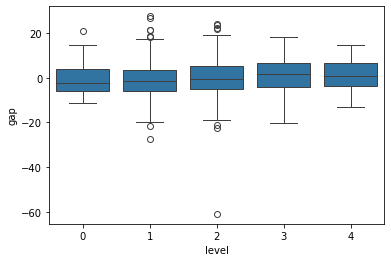

In [72]:
sns.boxplot(data=eye_predic, x="level", y="gap")

In [74]:
eye_predic['if_depression'] = eye_predic['level']>0 

<AxesSubplot: xlabel='if_depression', ylabel='gap'>

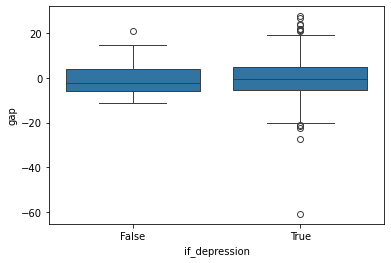

In [76]:
sns.boxplot(data=eye_predic, x="if_depression", y="gap")

In [78]:
eye_predic['gap'][eye_predic['if_depression'] == 'True']

Series([], Name: gap, dtype: float64)

In [79]:
stats.ttest_ind(eye_predic['gap'][eye_predic['if_depression'] == True], 
                eye_predic['gap'][eye_predic['if_depression'] == False], equal_var=False)

Ttest_indResult(statistic=0.6782195540252042, pvalue=0.5002361867995003)

In [80]:
eye_predic['age_direct'] = eye_predic['gap']>0

In [81]:
stats.ttest_ind(eye_predic['level'][eye_predic['age_direct'] == True], 
                eye_predic['level'][eye_predic['age_direct'] == False], equal_var=False)

Ttest_indResult(statistic=5.70297318679773, pvalue=1.2682193746955681e-08)

In [84]:
np.mean(eye_predic['level'][eye_predic['age_direct'] == True])

1.8450860632981676

In [85]:
np.mean(eye_predic['level'][eye_predic['age_direct'] == False])

1.7063142437591776

In [87]:
pearsonr(eye_predic['level'][eye_predic['age_direct'] == True], eye_predic['gap'][eye_predic['age_direct'] == True])

(0.06584705539520146, 0.00518156597621606)

In [82]:
stats.ttest_ind(eye_predic['PHQ_9_score'][eye_predic['age_direct'] == True], 
                eye_predic['PHQ_9_score'][eye_predic['age_direct'] == False], equal_var=False)

Ttest_indResult(statistic=2.0978571270094504, pvalue=0.03598619580914193)

In [2]:
img_age = pd.read_csv('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/results/eye/eyeAge_fundus_20250109.csv',index_col=0)
img_age

,True Age,Predicted Age
eid,,
4542038,57,57
4467173,62,59
1853560,50,50
4482541,58,55
2469700,55,53
...,...,...
6011917,48,54
1736514,56,53
4138795,47,47


In [6]:
img_age['True Age'] = img_age['True Age'].astype('float')
img_age['Predicted Age'] = img_age['Predicted Age'].astype('float')

In [29]:
img_age = img_age.loc[img_age['True Age'].sort_values().index]

In [36]:
from scipy.stats import pearsonr
r, _ = pearsonr(img_age['True Age'], img_age['Predicted Age'])
r

0.8206068546246729

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(img_age['True Age'], img_age['Predicted Age'])

3.574134043861447

Text(33, 33, 'r = 0.82\nMAE = 3.57')

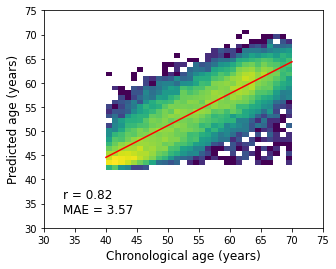

In [43]:
from matplotlib import colors 
plt.figure(figsize=(5, 4))
plt.hist2d(img_age['True Age'], img_age['Predicted Age'], bins=30, cmap="viridis", norm = colors.LogNorm())
plt.xlabel('Chronological age (years)',fontsize=12)
plt.ylabel('Predicted age (years)',fontsize=12)
#plt.title(sex+': '+organ+' ('+str(num_features)+' features)')
plt.xlim(30,75)
plt.ylim(30,75)

m, b = np.polyfit(img_age['True Age'], img_age['Predicted Age'], 1)  # 线性拟合
plt.plot(list(img_age['True Age']), list(m * np.array(img_age['True Age']) + b), color='red', label='Fit line')
plt.text(33, 33, f"r = {0.82:.2f}\nMAE = {3.57:.2f}", 
             fontsize=12, color='black')

In [19]:
x = list(img_age['True Age'])
y = list(m * np.array(img_age['Predicted Age']) + b)

In [22]:
x[1:6]

[62.0, 50.0, 58.0, 55.0, 48.0]

In [23]:
y[1:6]

[57.07552049309998,
 51.122059886606905,
 54.42953800132528,
 53.10654675543793,
 53.76804237838161]

In [157]:
depression = pd.read_csv('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/data/UKB/brain/depression_all.csv',index_col=1)
inter_id = set(img_age.index) & set(depression.index)
len(inter_id)

8786

In [158]:
img_age = img_age.loc[inter_id]
img_age['PHQ_9_score'] = depression.loc[inter_id][['PHQ_9_score']]
img_age['level'] = depression.loc[inter_id][['level']]

/tmp/ipykernel_199526/3986213138.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  img_age = img_age.loc[inter_id]
/tmp/ipykernel_199526/3986213138.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  img_age['PHQ_9_score'] = depression.loc[inter_id][['PHQ_9_score']]
/tmp/ipykernel_199526/3986213138.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  img_age['level'] = depression.loc[inter_id][['level']]


In [159]:
img_age['gap'] = img_age['Predicted Age'] - img_age['True Age']

In [164]:
img_age['PHQ_9_score'][img_age['PHQ_9_score']<0] = 0
img_age['if_depression'] = img_age['level']>0 
img_age['age_direct'] = img_age['gap']>0


/tmp/ipykernel_199526/614550437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_age['PHQ_9_score'][img_age['PHQ_9_score']<0] = 0


In [165]:
stats.ttest_ind(img_age['PHQ_9_score'][img_age['age_direct'] == True], 
                img_age['PHQ_9_score'][img_age['age_direct'] == False], equal_var=False)

Ttest_indResult(statistic=7.173993747468999, pvalue=7.876211565307437e-13)

In [166]:
stats.ttest_ind(img_age['gap'][img_age['if_depression'] == True], 
                img_age['gap'][img_age['if_depression'] == False], equal_var=False)

Ttest_indResult(statistic=0.39499219093816873, pvalue=0.6934130109976853)

<AxesSubplot: xlabel='age_direct', ylabel='PHQ_9_score'>

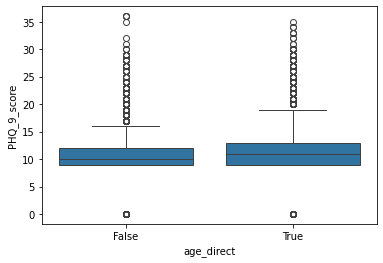

In [167]:
sns.boxplot(data=img_age, x="age_direct", y="PHQ_9_score")

In [111]:
eye_predic['PHQ_9_score'].min()

-3265.0

In [112]:
eye_predic['PHQ_9_score'].max()

36.0

In [151]:
img_age['PHQ_9_score'][img_age['PHQ_9_score']<0] = 0

/tmp/ipykernel_199526/2028616569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_age['PHQ_9_score'][img_age['PHQ_9_score']<0] = 0


<AxesSubplot: xlabel='age_direct', ylabel='level'>

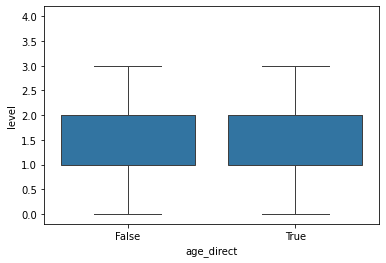

In [119]:
sns.boxplot(data=eye_predic, x="age_direct", y="level",fliersize=0)

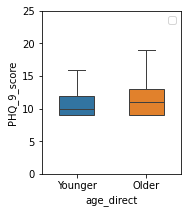

In [140]:
plt.figure(figsize=(2.5, 3))
sns.boxplot(data=eye_predic, x="age_direct", y="PHQ_9_score",fliersize=0,width=0.5,hue='age_direct')
plt.xticks(ticks=[0,1],labels=['Younger','Older'])
plt.ylim(0,25)
plt.legend("")
plt.savefig('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/figures/svm-eye/fundusAge_depressionScore.pdf')

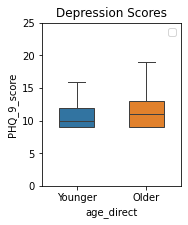

In [179]:
plt.figure(figsize=(2.5, 3))
sns.boxplot(data=img_age, x="age_direct", y="PHQ_9_score",fliersize=0,width=0.5,hue='age_direct')
plt.xticks(ticks=[0,1],labels=['Younger','Older'])
plt.ylim(0,25)
plt.legend("")
plt.title('Depression Scores')
plt.savefig('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/figures/svm-eye/fundusAge_depressionScore.pdf')

In [169]:
stats.ttest_ind(img_age['PHQ_9_score'][img_age['age_direct'] == True], 
                img_age['PHQ_9_score'][img_age['age_direct'] == False], equal_var=False)

Ttest_indResult(statistic=7.173993747468999, pvalue=7.876211565307437e-13)

In [170]:
anxiety = pd.read_csv('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/data/UKB/brain/anxiety_all.csv',index_col=1)
inter_id = set(img_age.index) & set(anxiety.index)
len(inter_id)

8786

In [171]:
anxiety

,Unnamed: 0,participant.p20509,participant.p20506,participant.p20516,participant.p20515,participant.p20505,participant.p20520,participant.p20512,GAD_7_score,level
participant.eid,,,,,,,,,,
1000035,2,3.0,3.0,1.0,1.0,1.0,3.0,1.0,13.0,2
1000046,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,1
1000078,6,1.0,1.0,1.0,2.0,2.0,1.0,1.0,9.0,1
1000112,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,1
1000236,22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...
6023584,502128,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,1
6023609,502130,1.0,1.0,1.0,1.0,2.0,1.0,1.0,8.0,1
6023638,502133,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,1


In [172]:
img_age = img_age.loc[inter_id]
img_age['GAD_7_score'] = anxiety.loc[inter_id][['GAD_7_score']]

/tmp/ipykernel_199526/3319167610.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  img_age = img_age.loc[inter_id]
/tmp/ipykernel_199526/3319167610.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  img_age['GAD_7_score'] = anxiety.loc[inter_id][['GAD_7_score']]


In [174]:
img_age['GAD_7_score'][img_age['GAD_7_score']<0] = 0

/tmp/ipykernel_199526/1517830364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_age['GAD_7_score'][img_age['GAD_7_score']<0] = 0


In [175]:
stats.ttest_ind(img_age['GAD_7_score'][img_age['age_direct'] == True], 
                img_age['GAD_7_score'][img_age['age_direct'] == False], equal_var=False)

Ttest_indResult(statistic=7.624189294316274, pvalue=2.7090177894375697e-14)

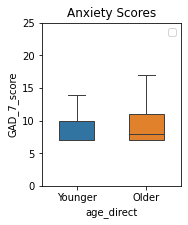

In [178]:
plt.figure(figsize=(2.5, 3))
sns.boxplot(data=img_age, x="age_direct", y="GAD_7_score",fliersize=0,width=0.5,hue='age_direct')
plt.xticks(ticks=[0,1],labels=['Younger','Older'])
plt.ylim(0,25)
plt.legend("")
plt.title('Anxiety Scores')
plt.savefig('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/figures/svm-eye/fundusAge_anxietyScore.pdf')

In [118]:
eye = pd.read_csv('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/data/UKB/eye/502137_baseline_152features_20241227.csv',index_col=0)
eye = eye.loc[inter_id]

/tmp/ipykernel_199526/3206023185.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  eye = eye.loc[inter_id]


In [ ]:
body = np.save('/share2/pub/zhangyr/zhangyr/myIdea/bioAge/results/body/SVM_7organ_body_20241227.npy'